In [1]:
import pandas as pd
import numpy as np

In [3]:
train_csv = 'train_data.csv'

In [5]:
train_df = pd.read_csv(train_csv)

In [7]:
train_df.shape

(1643680, 419)

In [6]:
train_df.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_df['experiment_type'].unique()

array(['2A3_MaP', 'DMS_MaP'], dtype=object)

In [10]:
train_df['experiment_type'].value_counts()

experiment_type
2A3_MaP    821840
DMS_MaP    821840
Name: count, dtype: int64

In [13]:
train_df['sequence_id'].nunique()

806573

In [12]:
train_df[train_df['signal_to_noise'] > 100].head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
1606423,ebe90364da34,GGGAACGACUCGAGUAGAGUCGAAAAACUUUUCGACUCUGAUACCA...,2A3_MaP,PK50_CustomArray_2A3,2520920,107.483,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1611881,ebe90364da34,GGGAACGACUCGAGUAGAGUCGAAAAACUUUUCGACUCUGAUACCA...,2A3_MaP,PK50_Twist_2A3,2624714,109.161,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614610,ebe90364da34,GGGAACGACUCGAGUAGAGUCGAAAAACUUUUCGACUCUGAUACCA...,DMS_MaP,PK50_Twist_DMS,3366351,115.017,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1617339,ebe90364da34,GGGAACGACUCGAGUAGAGUCGAAAAACUUUUCGACUCUGAUACCA...,2A3_MaP,PK50_Twist_epPCR_2A3,5283160,146.537,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620068,ebe90364da34,GGGAACGACUCGAGUAGAGUCGAAAAACUUUUCGACUCUGAUACCA...,DMS_MaP,PK50_Twist_epPCR_DMS,6861697,101.303,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_df['SN_filter'].value_counts()

SN_filter
0    1205441
1     438239
Name: count, dtype: int64

In [22]:
train_df['reads'].value_counts().describe()

count    49182.000000
mean        33.420357
std        385.240130
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      37867.000000
Name: count, dtype: float64

<Axes: >

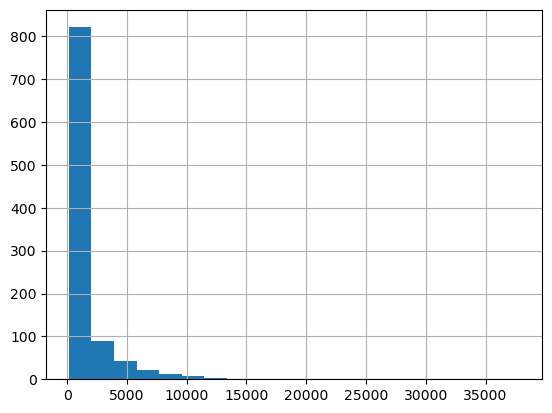

In [29]:
train_df.loc[train_df['reads'] < 1000]['reads'].value_counts().hist(bins = 20)

In [32]:
train_df[(train_df['reads'] < 1000) & (train_df['reads'] >0)]['reads'].value_counts()

reads
1      17595
2      15396
3      13863
4      13010
5      12301
       ...  
991      151
999      149
990      149
980      146
985      145
Name: count, Length: 999, dtype: int64

In [48]:
# train_df[(train_df['reads'] < 1000) & (train_df['reads'] >0)]['reads'].value_counts().hist(bins=20)

In [35]:
sequences_df = train_df[['sequence_id', 'sequence']]

In [36]:
sequences_df.shape

(1643680, 2)

In [37]:
sequences_df.drop_duplicates(keep='first').shape

(806573, 2)

In [38]:
sequences_df.head()

,sequence_id,sequence
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...


### Duplicates

In [58]:
result = train_df.groupby(['sequence_id']).size()
result

sequence_id
00005a0b365f    2
00006c296445    2
0000c9fe9c6f    2
0000d87cab97    2
0000dadc9e14    2
               ..
ffffde700333    2
ffffe6075b10    2
ffffea5adcdc    2
fffff1a0b9c7    2
fffff856246f    2
Length: 806573, dtype: int64

In [88]:
# result.sort_values()

In [90]:
# more than duplicated
result[result != 2].sort_values()

sequence_id
242ba13c8e66     4
638a29aa8e7e     4
3dd0d92ccf42     4
216407a3e9ce     4
cc7d74ed7f03     4
                ..
6c41847f95fe    10
6c4b6478e286    10
6c62fb788490    10
6b8c06a1a580    10
fffe796da890    10
Length: 4907, dtype: int64

### Reactivity

In [49]:
reactivity_columns = train_df.columns[train_df.columns.str.startswith('reactivity_0')]

In [60]:
# reactivity_columns.to_list()

In [104]:
# train_df.iloc[0]
# train_df.iloc[0][train_df.iloc[0].notna()]

In [71]:
react_df = train_df[['sequence_id'] + reactivity_columns.tolist()].fillna(0.0)

In [72]:
react_df.head()

,sequence_id,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,reactivity_0008,reactivity_0009,...,reactivity_0197,reactivity_0198,reactivity_0199,reactivity_0200,reactivity_0201,reactivity_0202,reactivity_0203,reactivity_0204,reactivity_0205,reactivity_0206
0,8cdfeef009ea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51e61fbde94d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25ce8d5109cd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,07dcfb6d1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,e561cc042a4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# react_df.iloc[0].tolist()

In [81]:
train_df[train_df['sequence_id'] == '000d960a19ca']

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
1599823,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,2A3_MaP,PK50_AltChemMap_NovaSeq_2A3,53462,17.650,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602552,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,DMS_MaP,PK50_AltChemMap_NovaSeq_DMS,61071,22.555,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1605281,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,2A3_MaP,PK50_CustomArray_2A3,11065,5.974,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1608010,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,DMS_MaP,PK50_CustomArray_DMS,15543,6.575,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1610739,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,2A3_MaP,PK50_Twist_2A3,10994,7.678,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1613468,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,DMS_MaP,PK50_Twist_DMS,11210,7.567,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1616197,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,2A3_MaP,PK50_Twist_epPCR_2A3,14291,8.453,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618926,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,DMS_MaP,PK50_Twist_epPCR_DMS,15387,7.066,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1621655,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,2A3_MaP,PK50_Wu_Twist_2A3,35402,13.128,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1624384,000d960a19ca,GGGAACGACUCGAGUAGAGUCGAAAAUAAAAGCCAUGCACCACCAA...,DMS_MaP,PK50_Wu_Twist_DMS,23915,11.296,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# train_df.goupby(['sequence_id']).count()